In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [3]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [4]:

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4


,Title,Wins
0,Titanic,12
1,The Lord of the Rings: The Return of the King,11
2,Ben-Hur,11
3,West Side Story,10
4,Gigi,9
...,...,...
1268,The Blood of Yingzhou District,1
1269,Irma La Douce,1
1270,My Gal Sal,1
1271,Belle Epoque,1


In [5]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
#df2
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [7]:
df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Mutiny on the Bounty,15
3,Moulin Rouge,15
4,Cleopatra,14
...,...,...
4828,The Lady in Waiting,1
4829,The Milky Way,1
4830,"Give 'em Hell, Harry!",1
4831,Khartoum,1


In [8]:
df3 = pd.merge(df2, df4, on="Title", how="left")
df3.fillna(0)

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Mutiny on the Bounty,15,1.0
3,Moulin Rouge,15,4.0
4,Cleopatra,14,5.0
...,...,...,...
4828,The Lady in Waiting,1,0.0
4829,The Milky Way,1,1.0
4830,"Give 'em Hell, Harry!",1,0.0
4831,Khartoum,1,0.0


In [9]:
df2 = pd.DataFrame(df)

In [10]:
movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [11]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [12]:
# Merge on left dataframe to keep all streaming movies
#movies_clean_df2 = pd.merge(movies_clean_df, df2, on="Title", how="left")
combined_df = pd.merge(movies_clean_df, oscars_clean_df, on="Title", how="left")
combined_df.head()

,Title,Year_x,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Year_y,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,2010.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,NaN,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,NaN,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,NaN,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN


In [13]:
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               34
Year_x              34
Age                 33
IMDb                34
Rotten Tomatoes     32
Netflix             34
Hulu                34
Prime Video         34
Disney+             34
Type                34
Directors           33
Genres              34
Country             34
Language            34
Runtime             34
Year_y              34
Won Best Picture    34
dtype: int64

In [14]:
combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [15]:
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

In [16]:
# False = 0
# True = 1
# Wins
# Nominated

In [17]:
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

,Title,Year_x,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Year_y,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,2010.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,2002.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,2012.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,1981.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,2009.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,1976.0,1.0
20,There Will Be Blood,2007,18+,8.2,91%,1,0,0,0,0,Paul Thomas Anderson,Drama,United States,"English,American Sign Language",158.0,2007.0,1.0
13,Room,2015,18+,8.1,93%,1,0,0,0,0,Lenny Abrahamson,"Drama,Thriller","Ireland,Canada,United Kingdom,United States",English,118.0,2015.0,1.0
30,Marriage Story,2019,18+,8.0,95%,1,0,0,0,0,Noah Baumbach,"Comedy,Drama,Romance","United Kingdom,United States","English,Spanish",137.0,2019.0,1.0
22,Dallas Buyers Club,2013,18+,8.0,93%,1,0,0,0,0,Jean-Marc Vallée,"Biography,Drama",United States,"English,Japanese",117.0,2013.0,1.0


In [18]:
combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [19]:
combined_df.dtypes

Title                object
Year_x                int64
Age                  object
IMDb                float64
Rotten Tomatoes      object
Netflix               int64
Hulu                  int64
Prime Video           int64
Disney+               int64
Type                  int64
Directors            object
Genres               object
Country              object
Language             object
Runtime             float64
Year_y              float64
Won Best Picture    float64
dtype: object

In [20]:
combined_df['Genres'].value_counts()

Drama                                    1341
Documentary                              1229
Comedy                                   1040
Comedy,Drama                              446
Horror                                    436
                                         ... 
Drama,Fantasy,Horror,Romance,Thriller       1
Animation,Action,Comedy,Family              1
Documentary,Thriller                        1
Action,Adventure,Romance,Sci-Fi             1
Fantasy,Horror,Romance                      1
Name: Genres, Length: 1909, dtype: int64

In [21]:
genres_df = combined_df[['Genres', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Genres')
genres_df


,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
"Action,Sci-Fi",1,0,0,0
"Action,Adventure,Sci-Fi",1,0,0,0
"Adventure,Comedy,Sci-Fi",1,0,0,0
Western,1,0,1,0
...,...,...,...,...
"Comedy,Family,Fantasy,Horror",0,0,0,1
"Comedy,Family,Sci-Fi",0,0,0,1
Documentary,0,0,0,1


In [22]:
country_df = combined_df['Country'].value_counts()
country_df


United States                                               8776
India                                                       1064
United Kingdom                                               905
Canada                                                       555
Australia                                                    202
                                                            ... 
Germany,Canada,United Kingdom,South Africa,United States       1
Tunisia,Belgium,France                                         1
United States,Germany,Ireland,United Kingdom                   1
Germany,Bulgaria,Austria                                       1
Cameroon,United States                                         1
Name: Country, Length: 1303, dtype: int64

In [23]:
#Create new dataframe excluding null values from 'Country'
country_df = combined_df[combined_df['Country'].notnull()]

#Split genres name and count no. of movies in each genre
country_count = {}
for x in country_df["Country"].values:

    country_list = x.split(",")
    #print (country_list)
    for y in country_list:
        y = y.strip()
        #print(y)
        if y not in country_count:
            country_count[y]=0
        country_count[y] +=1
        #print(country_count)
    
#country_count

country_name = country_count.keys() 
count_country = country_count.values() 



allcountries_df=pd.DataFrame(count_country, country_name)
allcountries_df.head(5)

,0
United States,10486
United Kingdom,1713
Italy,417
Spain,329
West Germany,69


In [24]:
#Select the top 15 countries by value counts
country_top_df = allcountries_df[0:15]

country_top_df=country_top_df.reset_index().rename(columns={'index':'Country', 0:'Counts'})

country_top_df= country_top_df.sort_values('Counts',ascending = False)

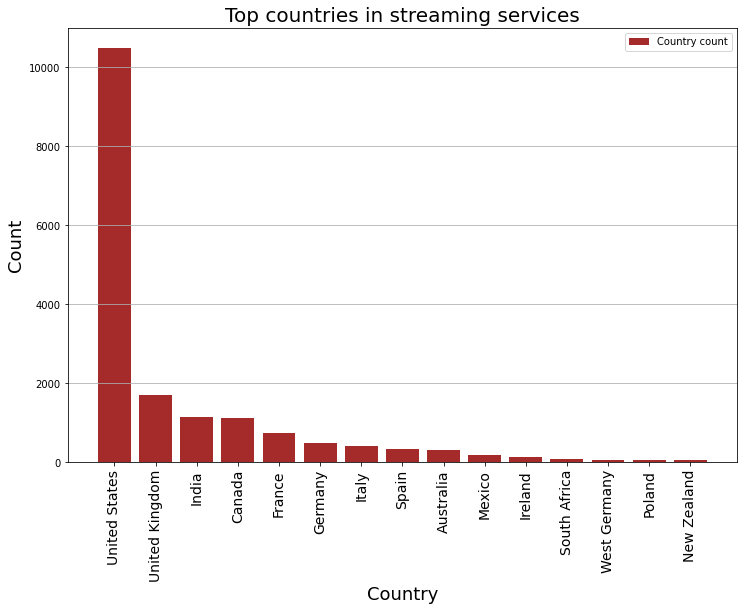

In [55]:
#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/countries.png")
plt.show()



In [26]:
#Create new dataframe excluding null values from 'Language'
language_df = combined_df[combined_df['Language'].notnull()]

#Split genres name and count no. of movies in each genre
language_count = {}
for x in language_df["Language"].values:

    language_list = x.split(",")
    #print (language_list)
    for y in language_list:
        y = y.strip()
        #print(y)
        if y not in language_count:
            language_count[y]=0
        language_count[y] +=1
        #print(country_count)
    
#country_count

language_name = language_count.keys() 
count_language = language_count.values() 



alllanguages_df=pd.DataFrame(count_language, language_name)
alllanguages_df.head(5)

,0
English,13233
Japanese,317
French,799
Italian,440
Spanish,872


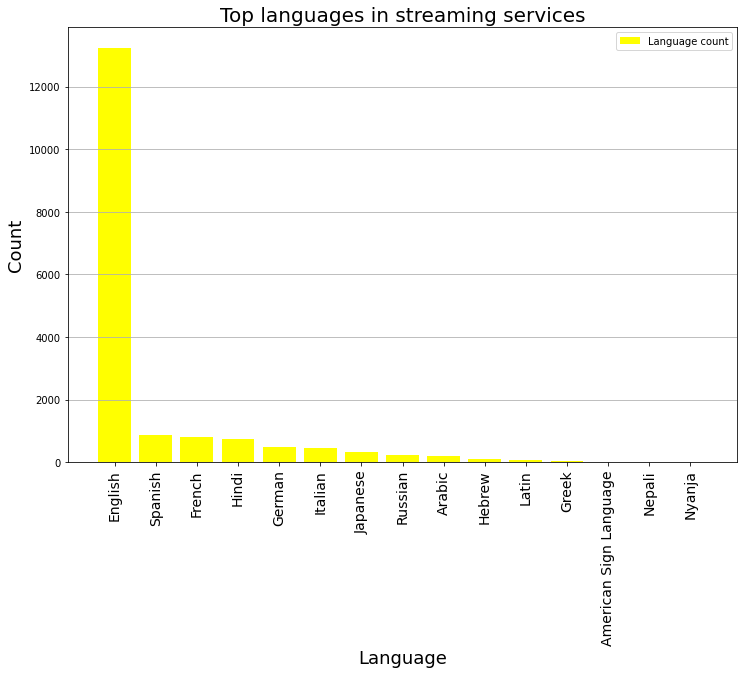

In [27]:
#Select the top 15 languages by value counts
language_top = alllanguages_df[0:15]
language_top_df=language_top.reset_index().rename(columns={'index':'Language', 0:'Counts'})
language_top_df= language_top_df.sort_values('Counts',ascending = False)

#Specify x & y values
xvalues = language_top_df['Language'].values
yvalues= language_top_df['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='yellow', alpha = 1, align="center")
plt.xticks(language_top_df['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in streaming services", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/languages.png")
plt.show()

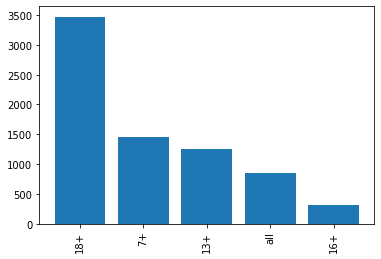

In [28]:
age = combined_df['Age'].value_counts()
#age
age_df=age.to_frame().reset_index().rename(columns={"index":"Age", "Age":"Counts"})
#age_df = age_df.set_index()
#age_df.set_index(Age)
#plt.pie =(age_df['Counts'].values, labels = index.values)
#plt.show()
#plt.pie(group_netflix.values,labels=group_netflix.index)
plt.bar(age.index, age.values)
plt.xticks(age.index, rotation=90)
plt.show()


In [29]:
#countries_stream_df = combined_df[['Country', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Country')
#countries_stream_df.dropna(how='any')
#bool_series = pd.isnull(countries_stream_df['Hulu'])
#countries_stream_df[bool_series]
#countries_stream_df
stream_services_country = combined_df.groupby('Country')[['Netflix', 'Hulu', 'Prime Video','Disney+']].count()
#stream_services_country_df = stream_services_country.to_frame()
stream_services_country

,Netflix,Hulu,Prime Video,Disney+
Country,,,,
"Afghanistan,France",1,1,1,1
"Afghanistan,United States",1,1,1,1
"Albania,Austria,France",1,1,1,1
"Albania,Greece,France",1,1,1,1
"Albania,United States",1,1,1,1
...,...,...,...,...
"West Germany,Switzerland,United States",1,1,1,1
"West Germany,United States",4,4,4,4
Yugoslavia,1,1,1,1


In [30]:
# List of service names
service_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

#Create a dataframe for Netflix values =1
netflix_data = combined_df.copy()
netflix_data = netflix_data[combined_df['Netflix']==1]

#Create a dataframe for Prime Video values =1
prime_data = combined_df.copy()
prime_data = prime_data[combined_df['Prime Video']==1]

#Create a dataframe for Hulu values =1
hulu_data = combined_df.copy()
hulu_data = hulu_data[combined_df['Hulu']==1]

#Create a dataframe for Disney+ values =1
disney_data = combined_df.copy()
disney_data = disney_data[combined_df['Disney+']==1]


In [31]:
#Clean Rotten Tomatoes column to remove '%'sign
combined_df['New_Rotten_Tomatoes'] = combined_df['Rotten Tomatoes'].str.replace("%","")
rot_tom = combined_df['New_Rotten_Tomatoes'].value_counts().sort_values(ascending=False)
rotten_tomatoes_df = rot_tom.to_frame().reset_index().rename(columns={'index':'Ratings', 'New_Rotten_Tomatoes':'Counts'})
rotten_tomatoes_df
# combined_df['Rotten Tomatoes'].value_counts()


# for i in combined_df['New_Rotten_Tomatoes']:
#     if i is str:
#         i = i.astype(int)



,Ratings,Counts
0,100,407
1,80,162
2,50,136
3,83,131
4,67,126
...,...,...
94,7,10
95,28,10
96,4,9
97,2,4


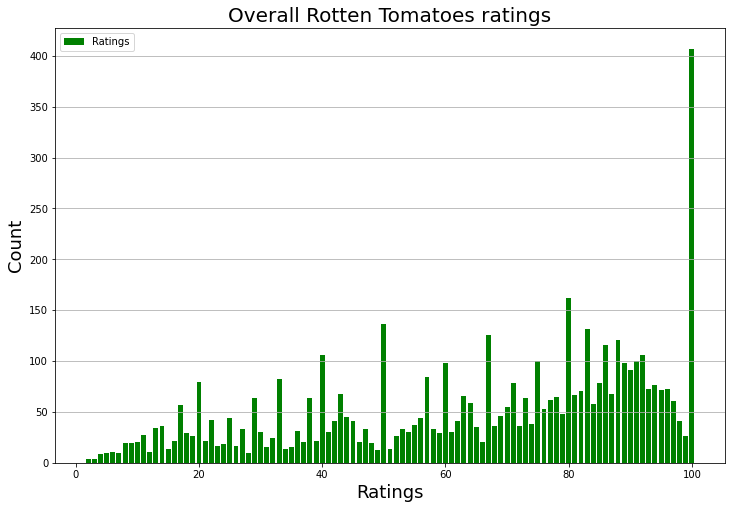

In [39]:
rot_x = rotten_tomatoes_df['Ratings'].values.astype("int")
rot_y= rotten_tomatoes_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(rot_x, rot_y, label='Ratings', color='Green', alpha = 1, align="center")
ticks=(np.arange(10, 100, step=10))
# plt.xticks(ticks, fontsize=14)

# Set a Title and labels
plt.title("Overall Rotten Tomatoes ratings", fontsize=20)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/rot_tom.png")
plt.show()


array([100.,  80.,  50.,  83.,  67.,  88.,  86.,  40.,  92.,  75.,  91.,
        60.,  89.,  90.,  57.,  33.,  20.,  71.,  85.,  94.,  93.,  96.,
        95.,  82.,  43.,  87.,  81.,  63.,  78.,  38.,  29.,  73.,  77.,
        97.,  64.,  84.,  17.,  70.,  76.,  79.,  69.,  44.,  25.,  56.,
        22.,  98.,  45.,  42.,  62.,  74.,  55.,  68.,  14.,  72.,  65.,
        13.,  27.,  53.,  58.,  47.,  36.,  30.,  54.,  61.,  41.,  59.,
        18.,  11.,  19.,  52.,  99.,  32.,  21.,  16.,  39.,  66.,  10.,
        46.,  37.,  48.,   9.,   8.,  24.,  23.,  26.,  35.,  31.,  15.,
        51.,  34.,  49.,  12.,   6.,   5.,   7.,  28.,   4.,   2.,   3.])

In [172]:
rot_tom_scores = pd.DataFrame({'Streaming Service': service_names,
                                    'Rotten Tomatoes Score' : [prime_data['Rotten Tomatoes'].value_counts()[0], 
                                                             hulu_data['Rotten Tomatoes'].value_counts()[0],
                                                             disney_data['Rotten Tomatoes'].value_counts()[0],
                                                             netflix_data['Rotten Tomatoes'].value_counts()[0]]})
rot_tom_scores
                                                              

,Streaming Service,Rotten Tomatoes Score
0,Netflix,257
1,Hulu,18
2,Prime Video,19
3,Disney+,130


<Figure size 864x576 with 0 Axes>

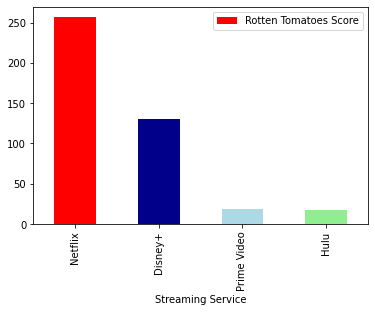

In [169]:
plt.figure(figsize=(12,8))
rot_tom_scores.sort_values(ascending=False, by="Rotten Tomatoes Score").plot.bar('Streaming Service', 'Rotten Tomatoes Score', 
                           color=["red", "darkblue", "lightblue", "lightgreen"])
                                                                               
plt.show()                                                                              

In [47]:
imdb = combined_df['IMDb'].value_counts().reset_index().sort_values("index").set_index("index")
imdb["IMDb"]

index
0.0     4
1.0     2
1.3     1
1.4     4
1.5     2
       ..
8.8    14
8.9    11
9.0     3
9.1     3
9.3     6
Name: IMDb, Length: 82, dtype: int64

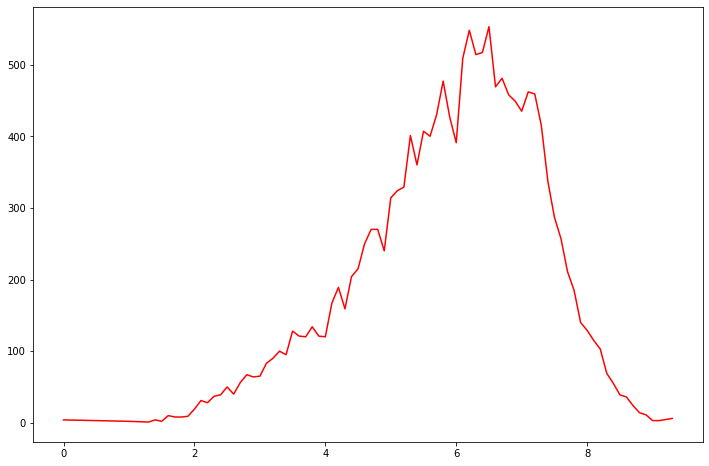

In [53]:
plt.figure(figsize=(12,8))
plt.plot(imdb.index, imdb["IMDb"], color="Red")

In [114]:
#Netflix movies count for year 2015-2020
netflix_new = netflix_data[netflix_data["Year_x"]>=2015].groupby(["Year_x"])['Netflix'].count()      
netflix_new

netflix_new_df = netflix_new.to_frame().reset_index().rename(columns={"Year_x":"Year", "Netflix":"Netflix"})
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count for year 2015-2020
prime_new = prime_data[prime_data["Year_x"]>=2015].groupby(["Year_x"])['Prime Video'].count()      
prime_new

prime_new_df = prime_new.to_frame().reset_index().rename(columns={"Year_x":"Year", "Prime Video":"Prime Video"})
prime_new_df.T

#Hulu movies count for year 2015-2020
hulu_new = hulu_data[hulu_data["Year_x"]>=2015].groupby(["Year_x"])['Hulu'].count()      
hulu_new

hulu_new_df = hulu_new.to_frame().reset_index().rename(columns={"Year_x":"Year", "Hulu":"Hulu"})
hulu_new_df.T

#Disney movies count for year 2015-2020
disney_new = disney_data[disney_data["Year_x"]>=2015].groupby(["Year_x"])['Disney+'].count()      
disney_new

disney_new_df = disney_new.to_frame().reset_index().rename(columns={"Disney+":"Disney+", "Year_x":"Year"})
disney_new_df

,Year,Disney+
0,2015,10
1,2016,17
2,2017,22
3,2018,16
4,2019,23
5,2020,9


In [229]:
merge1 = pd.merge(hulu_new_df, disney_new_df, on='Year' )
merge2 = pd.merge(prime_new_df, netflix_new_df, on='Year')
year_merge = pd.merge(merge1, merge2, on='Year')
year_merge.set_index('Year')

,Hulu,Disney+,Prime Video,Netflix
Year,,,,
2015,61,10,765,272
2016,62,17,730,444
2017,124,22,763,569
2018,158,16,625,560
2019,104,23,172,428
2020,6,9,31,104


<AxesSubplot:xlabel='Year'>

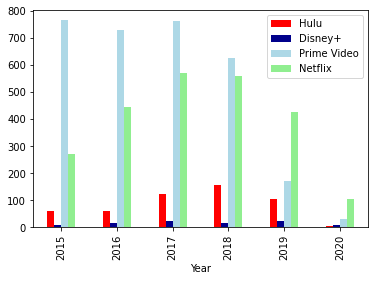

In [235]:
year_merge.plot.bar('Year',  color=["red", "darkblue", "lightblue", "lightgreen"])

In [173]:
# Count of movies produced in last 17 years
movie_count = combined_df.sort_values(['Year_x'], ascending=True)
movie_count = combined_df.Year_x.value_counts()[:20].reset_index().rename(columns = {"index": "Year" , "Year_x" : "Count"})
movie_count.sort_values(['Year'], ascending=True).head()

,Year,Count
18,2000,172
19,2001,156
17,2002,193
16,2003,214
15,2004,217


<Figure size 1440x720 with 0 Axes>

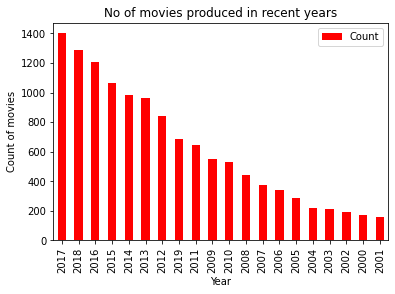

In [155]:
# Plot count of movies produced in last 17 years

plt.figure(figsize = (20,10))
movie_count.plot.bar("Year", "Count", colormap='autumn', alpha=1.0)
plt.title("No of movies produced in recent years")
plt.xlabel("Year")
plt.ylabel("Count of movies", )
plt.show()
